In [191]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [192]:

path_to_file = '../Datasets/GameStats.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.head(5)


,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,520,30,False,1.579998,150,0.0
1,9/7/2019 2:44:46 PM,520,30,False,3.805001,100,0.0
2,9/7/2019 2:59:20 PM,520,30,False,1.783006,50,0.0
3,9/7/2019 2:59:28 PM,520,30,True,0.263020,0,0.0
4,9/7/2019 2:59:48 PM,520,30,True,3.318019,50,0.0


Date:        date and time the game was auto-played

Level:       the 3-digit number is an estimate of the difficulty from a previous run

NumBlocks:   how many blocks have to be broken to win the level

IsWin:       True if autoplay broke all the blocks, False if the ball fell past the paddle

ElapsedTime: Seconds until either won or lost (game is played at 4x speed, so multiply by 4 to get an estimate of how long a human might play it)

Score:       total score when the game was won or lost

Accuracy:    the autoplay is tuned with a randomly-chosen accuracy. Higher numbers are more likely to win;

In [193]:
# Select column

# col_names = ['Date',	'Level',	'NumBlocks',	'IsWin',	'ElapsedTime',	'Score',	'Accuracy']
col_names = list(source_df.columns)

col_name = col_names[6]

In [194]:
# Remove outliers
if True: # one way
    q_low = source_df[col_name].quantile(0.005)
    q_hi  = source_df[col_name].quantile(0.995)

    source_df = source_df[(source_df[col_name] < q_hi) & (source_df[col_name] > q_low)]
else: # other way
    source_df[(np.abs(scipy.stats.zscore(source_df)) < 3).all(axis=1)]

Text(0, 0.5, 'Column val')

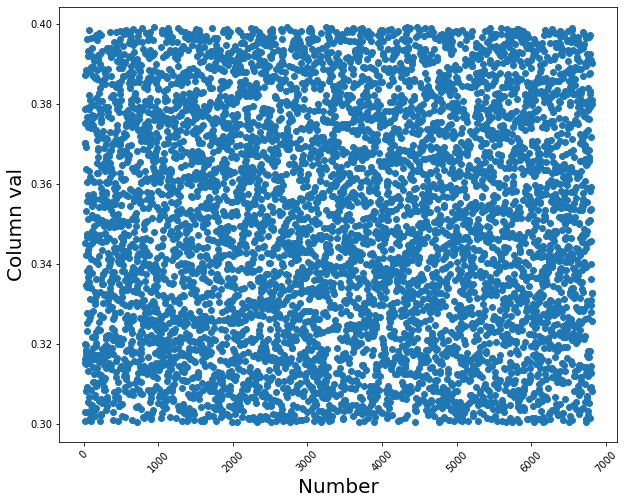

In [195]:
# Display our data
plt.figure(figsize=(10, 8))

plt.scatter(source_df.index, source_df[col_name])
plt.xticks(rotation=45)

plt.xlabel(u'Number', fontsize = 20)
plt.ylabel(u'Column val', fontsize = 20)

(array([611., 602., 609., 627., 632., 620., 605., 588., 639., 584., 627.]),
 array([0.3003654 , 0.30936563, 0.31836585, 0.32736608, 0.33636631,
        0.34536654, 0.35436676, 0.36336699, 0.37236722, 0.38136745,
        0.39036767, 0.3993679 ]),
 <BarContainer object of 11 artists>)

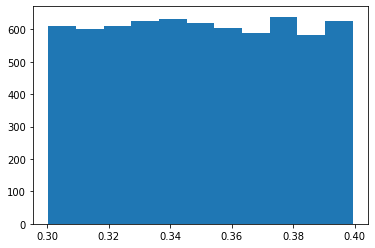

In [196]:
# Draw unnormed histogramm
plt.hist(source_df[col_name], bins=11)

C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


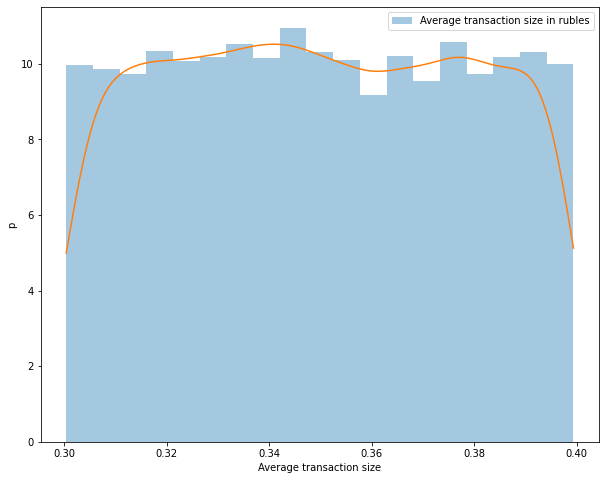

In [197]:
#Plotting a histogram and kernel density estimate
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(source_df[col_name])

min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values = kernel(x)

sns.distplot(source_df[col_name], kde=False, norm_hist=True, label=f'Average transaction size in rubles')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Average transaction size')

plt.legend()
plt.show()

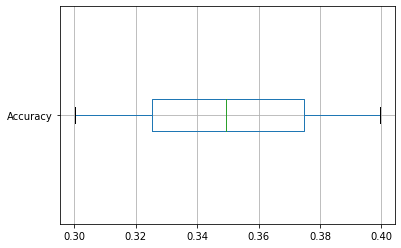

In [198]:
# Calculation of sample mean, variance, standard deviation, median
mean = source_df[col_name].mean()
var = source_df[col_name].var()
std = source_df[col_name].std()
median = source_df[col_name].median()
# Box plot
boxplot = source_df.boxplot(column=[col_name], whis=3., vert=False) # defaul whis is 1.5 (to many outliers there)

# boxplot = source_df.boxplot(column=['Accuracy'])

In [199]:
# Determination of the parameters of the lognormal distribution of the average transaction value for currency 981 
x = np.linspace(np.min(source_df[col_name]), np.max(source_df[col_name]))

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params = scipy.stats.lognorm.fit(source_df[col_name])
pdf = scipy.stats.lognorm.pdf(x, *params)

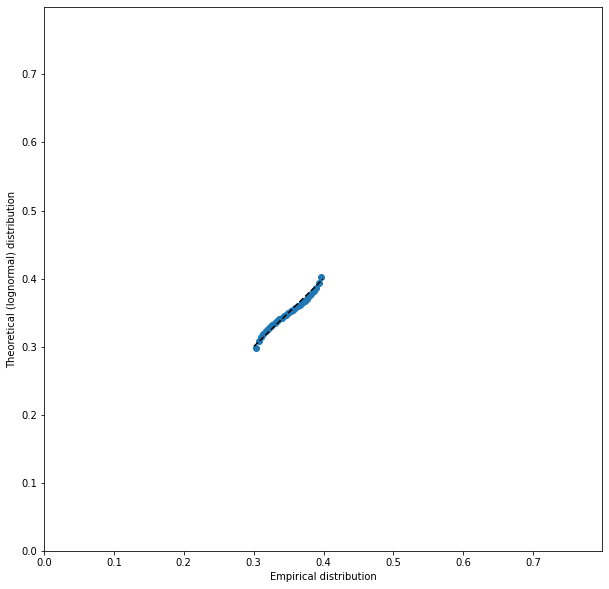

In [203]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 31)
qn_first = np.percentile(source_df[col_name], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, np.max(source_df[col_name]))
plt.ylim(0, np.max(source_df[col_name]))
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()

In [201]:
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = scipy.stats.kstest(source_df[col_name], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(source_df[col_name])
print(ks)
print(chi2)

KstestResult(statistic=0.06105617779116024, pvalue=2.6854750720909737e-22)
Power_divergenceResult(statistic=15.666901374626267, pvalue=1.0)
